## Overview

In this notebook, we are tasked with predicting the fare amount for a taxi ride in New York City given the pickup and dropoff locations, # of passengers, and the distance between two given points using a spherical approximation. The entire dataset consists of over 10 million rows of data and there is insufficient memory in the CPU to run the model, and decided to just focus on the first one million row or roughly 10% of the entire dataset. In this case, we are gonna build two machine learning algorithms for predicting the fare amount of taxi trip; Linear Regression and Random Forest, evaluate, and choose the best model for future works. 

## 1. Import data 

In [1]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

There are two datasets given in this project; Fare and Trip data. 

In [2]:
fare = pd.read_csv("trip_fare_4.csv")
data = pd.read_csv("trip_data_4.csv")

/Users/it/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 2. Data Cleansing and Inspection

In [3]:
# Splitting data for the data analysis and modeling

Data = data.iloc[:1500000,:]
Fare = fare.iloc[:1500000,:]

# Splitting the next 1000 data as an external input for validating the machine learning model

Data1 = data.iloc[1500001:1501000,:]
Fare1 = fare.iloc[1500001:1501000,:]

In [4]:
# inspecting the dataset information
Fare.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06
mean,1.234001e+01,2.866201e-01,4.981277e-01,1.475638e+00,2.296181e-01,1.483001e+01
std,9.916824e+00,3.254572e-01,3.053951e-02,2.179463e+00,1.154690e+00,1.194739e+01
min,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.130000e+01
75%,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.670000e+01
max,4.600000e+02,4.000000e+00,5.000000e-01,2.000000e+02,2.000000e+01,4.908300e+02


In [5]:
Data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06
mean,1.033359e+00,1.601819e+00,7.358760e+02,2.911831e+00,-7.270183e+01,4.004665e+01,-7.267638e+01,4.003320e+01
std,3.680216e-01,1.251809e+00,5.315811e+02,3.319693e+00,9.626059e+00,7.828029e+00,9.816042e+00,6.688470e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.955000e+01,-3.117554e+03,-7.365333e+02,-3.113278e+03
25%,1.000000e+00,1.000000e+00,3.630000e+02,1.100000e+00,-7.399272e+01,4.073328e+01,-7.399196e+01,4.073215e+01
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.820000e+00,-7.398230e+01,4.075129e+01,-7.398077e+01,4.075188e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.300000e+00,-7.396760e+01,4.076656e+01,-7.396346e+01,4.076799e+01
max,2.100000e+02,6.000000e+00,1.060700e+04,1.000000e+02,0.000000e+00,3.210385e+03,1.428738e+03,4.039800e+02


In this two dataset, it is found that almost column names start with blank space that is very uncomfortable to be seen and analyzed.

In [6]:
# most of the column name start with a blank space and need to be cleansed

Fare = Fare.rename(columns={" hack_license":"hack_license",
                     " vendor_id":"vendor_id",
                     " payment_type":"payment_type",
                     " pickup_datetime":"pickup_datetime",
                     " surcharge":"surcharge",
                     " mta_tax":"mta_tax",
                     " tip_amount":"tip_amount",
                     " fare_amount":"fare_amount",
                     " tolls_amount":"tolls_amount",
                     " total_amount":"total_amount"})

Data = Data.rename(columns={" hack_license":"hack_license",
                     " vendor_id":"vendor_id",
                     " rate_code":"rate_code",
                     " store_and_fwd_flag":"store_and_fwd_flag",
                     " pickup_datetime":"pickup_datetime",
                     " dropoff_datetime":"dropoff_datetime",
                     " passenger_count":"passenger_count",
                     " trip_time_in_secs":"trip_time_in_secs",
                     " trip_distance":"trip_distance",
                     " pickup_longitude":"pickup_longitude",
                     " pickup_latitude":"pickup_latitude",
                     " dropoff_longitude":"dropoff_longitude",
                     " dropoff_latitude":"dropoff_latitude"})

# for external input

Fare1 = Fare1.rename(columns={" hack_license":"hack_license",
                     " vendor_id":"vendor_id",
                     " payment_type":"payment_type",
                     " pickup_datetime":"pickup_datetime",
                     " surcharge":"surcharge",
                     " mta_tax":"mta_tax",
                     " tip_amount":"tip_amount",
                     " fare_amount":"fare_amount",
                     " tolls_amount":"tolls_amount",
                     " total_amount":"total_amount"})

Data1 = Data1.rename(columns={" hack_license":"hack_license",
                     " vendor_id":"vendor_id",
                     " rate_code":"rate_code",
                     " store_and_fwd_flag":"store_and_fwd_flag",
                     " pickup_datetime":"pickup_datetime",
                     " dropoff_datetime":"dropoff_datetime",
                     " passenger_count":"passenger_count",
                     " trip_time_in_secs":"trip_time_in_secs",
                     " trip_distance":"trip_distance",
                     " pickup_longitude":"pickup_longitude",
                     " pickup_latitude":"pickup_latitude",
                     " dropoff_longitude":"dropoff_longitude",
                     " dropoff_latitude":"dropoff_latitude"})

In [7]:
# transforming the pickup and dropoff column to datetime data type
# transforming the pickup and dropoff coordinate column to float data type

def todatetime(df):
    return df.astype('datetime64[ns]')

def tofloat(df):
    return df.astype('float')

# for machine learning model

Data[['pickup_datetime', 'dropoff_datetime']]  = Data[['pickup_datetime', 'dropoff_datetime']].apply(todatetime)

Data[['pickup_longitude', 'pickup_latitude', 
      'dropoff_longitude', 'dropoff_latitude']]  = Data[['pickup_longitude', 'pickup_latitude', 
                                                   'dropoff_longitude', 'dropoff_latitude']].apply(tofloat)

# for External data

Data1[['pickup_datetime', 'dropoff_datetime']]  = Data1[['pickup_datetime', 'dropoff_datetime']].apply(todatetime)

Data1[['pickup_longitude', 'pickup_latitude', 
      'dropoff_longitude', 'dropoff_latitude']]  = Data1[['pickup_longitude', 'pickup_latitude', 
                                                   'dropoff_longitude', 'dropoff_latitude']].apply(tofloat)

In [8]:
# extract the time from pickup and dropoff column

# Data['Time-pickedup'] = Data['pickup_datetime'].dt.time
Data['Hour-pickedup'] = Data['pickup_datetime'].dt.hour
Data1['Hour-pickedup'] = Data1['pickup_datetime'].dt.hour
Data['Weekday-pickedup'] = Data['pickup_datetime'].dt.weekday
Data1['Weekday-pickedup'] = Data1['pickup_datetime'].dt.weekday

# Data['Day-pickedup'] = Data['pickup_datetime'].dt.date
# Data['Month-pickedup'] = Data['pickup_datetime'].dt.month
# Data['Weekday-pickedup'] = Data['pickup_datetime'].dt.weekday

# Data['Time-dropoff'] = Data['dropoff_datetime'].dt.time
Data['Hour-dropoff'] = Data['dropoff_datetime'].dt.hour
Data1['Hour-dropoff'] = Data1['dropoff_datetime'].dt.hour
Data['Weekday-dropoff'] = Data['dropoff_datetime'].dt.weekday
Data1['Weekday-dropoff'] = Data1['dropoff_datetime'].dt.weekday
# Data['Day-dropoff'] = Data['dropoff_datetime'].dt.date
# Data['Month-dropoff'] = Data['dropoff_datetime'].dt.month
# Data['Weekday-dropoff'] = Data['dropoff_datetime'].dt.weekday

In [9]:
Data['Dayname-pickedup'] = Data['pickup_datetime'].dt.day_name()
Data1['Dayname-pickedup'] = Data1['pickup_datetime'].dt.day_name()

Data['Dayname-dropoff'] = Data['dropoff_datetime'].dt.day_name()
Data1['Dayname-dropoff'] = Data1['dropoff_datetime'].dt.day_name()

To make machine learning model works, every feature in the dataset must be encoded into numerical data types.

In [10]:
# encode the categorical feature: vendorid and store_fwd_flag column

def vendorid(data):
    if data == "CMT":
        return 1
    else: return 2

def storefwd(data):
    if data == "N":
        return 1
    elif data == "Y":
        return 2
    else: return 0
    
def paymenttype(data):
    if data == 'CRD':
        return 1
    elif data == 'CSH':
        return 2
    elif data == 'UNK':
        return 3
    elif data == 'NOC':
        return 4
    else: return 5
    
Data['vendor_id'] = Data['vendor_id'].apply(vendorid)
Data['store_and_fwd_flag'] = Data['store_and_fwd_flag'].apply(storefwd)
Fare['payment_type'] = Fare['payment_type'].apply(paymenttype)

Data1['vendor_id'] = Data1['vendor_id'].apply(vendorid)
Data1['store_and_fwd_flag'] = Data1['store_and_fwd_flag'].apply(storefwd)
Fare1['payment_type'] = Fare1['payment_type'].apply(paymenttype)

Calculating distance in km between latitude and longitude pickup and dropoff points. Source:
https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [11]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

Data['Distance (km)'] = haversine_np(Data['pickup_longitude'],Data['pickup_latitude'],Data['dropoff_longitude'],Data['dropoff_latitude'])
Data1['Distance (km)'] = haversine_np(Data1['pickup_longitude'],Data1['pickup_latitude'],Data1['dropoff_longitude'],Data1['dropoff_latitude'])

Since the medallion, hack_license, and vendor_id column in Fare dataset are the same for each row in Data dataset, then eliminate the three respective columns in Fare dataset and also drop the previous pickup and dropoff datetime column. 

In [12]:
Fare.drop(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime', 'surcharge', 'mta_tax'], axis=1, inplace=True)
Data.drop(['trip_distance', 'rate_code', 'store_and_fwd_flag'], axis=1, inplace=True)

# for External data

Fare1.drop(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime', 'surcharge', 'mta_tax'], axis=1, inplace=True)
Data1.drop(['trip_distance', 'rate_code', 'store_and_fwd_flag'], axis=1, inplace=True)

In [13]:
# merge two cleansed datasets into one for further analysis

BigData = pd.concat([Data, Fare], axis=1)
ExternalData = pd.concat([Data1, Fare1], axis=1)
BigData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   medallion          1500000 non-null  object        
 1   hack_license       1500000 non-null  object        
 2   vendor_id          1500000 non-null  int64         
 3   pickup_datetime    1500000 non-null  datetime64[ns]
 4   dropoff_datetime   1500000 non-null  datetime64[ns]
 5   passenger_count    1500000 non-null  int64         
 6   trip_time_in_secs  1500000 non-null  int64         
 7   pickup_longitude   1500000 non-null  float64       
 8   pickup_latitude    1500000 non-null  float64       
 9   dropoff_longitude  1500000 non-null  float64       
 10  dropoff_latitude   1500000 non-null  float64       
 11  Hour-pickedup      1500000 non-null  int64         
 12  Weekday-pickedup   1500000 non-null  int64         
 13  Hour-dropoff       1500000 

## C. Exploratory Data Analysis (EDA)

Numerical feature distributions before getting cleansed

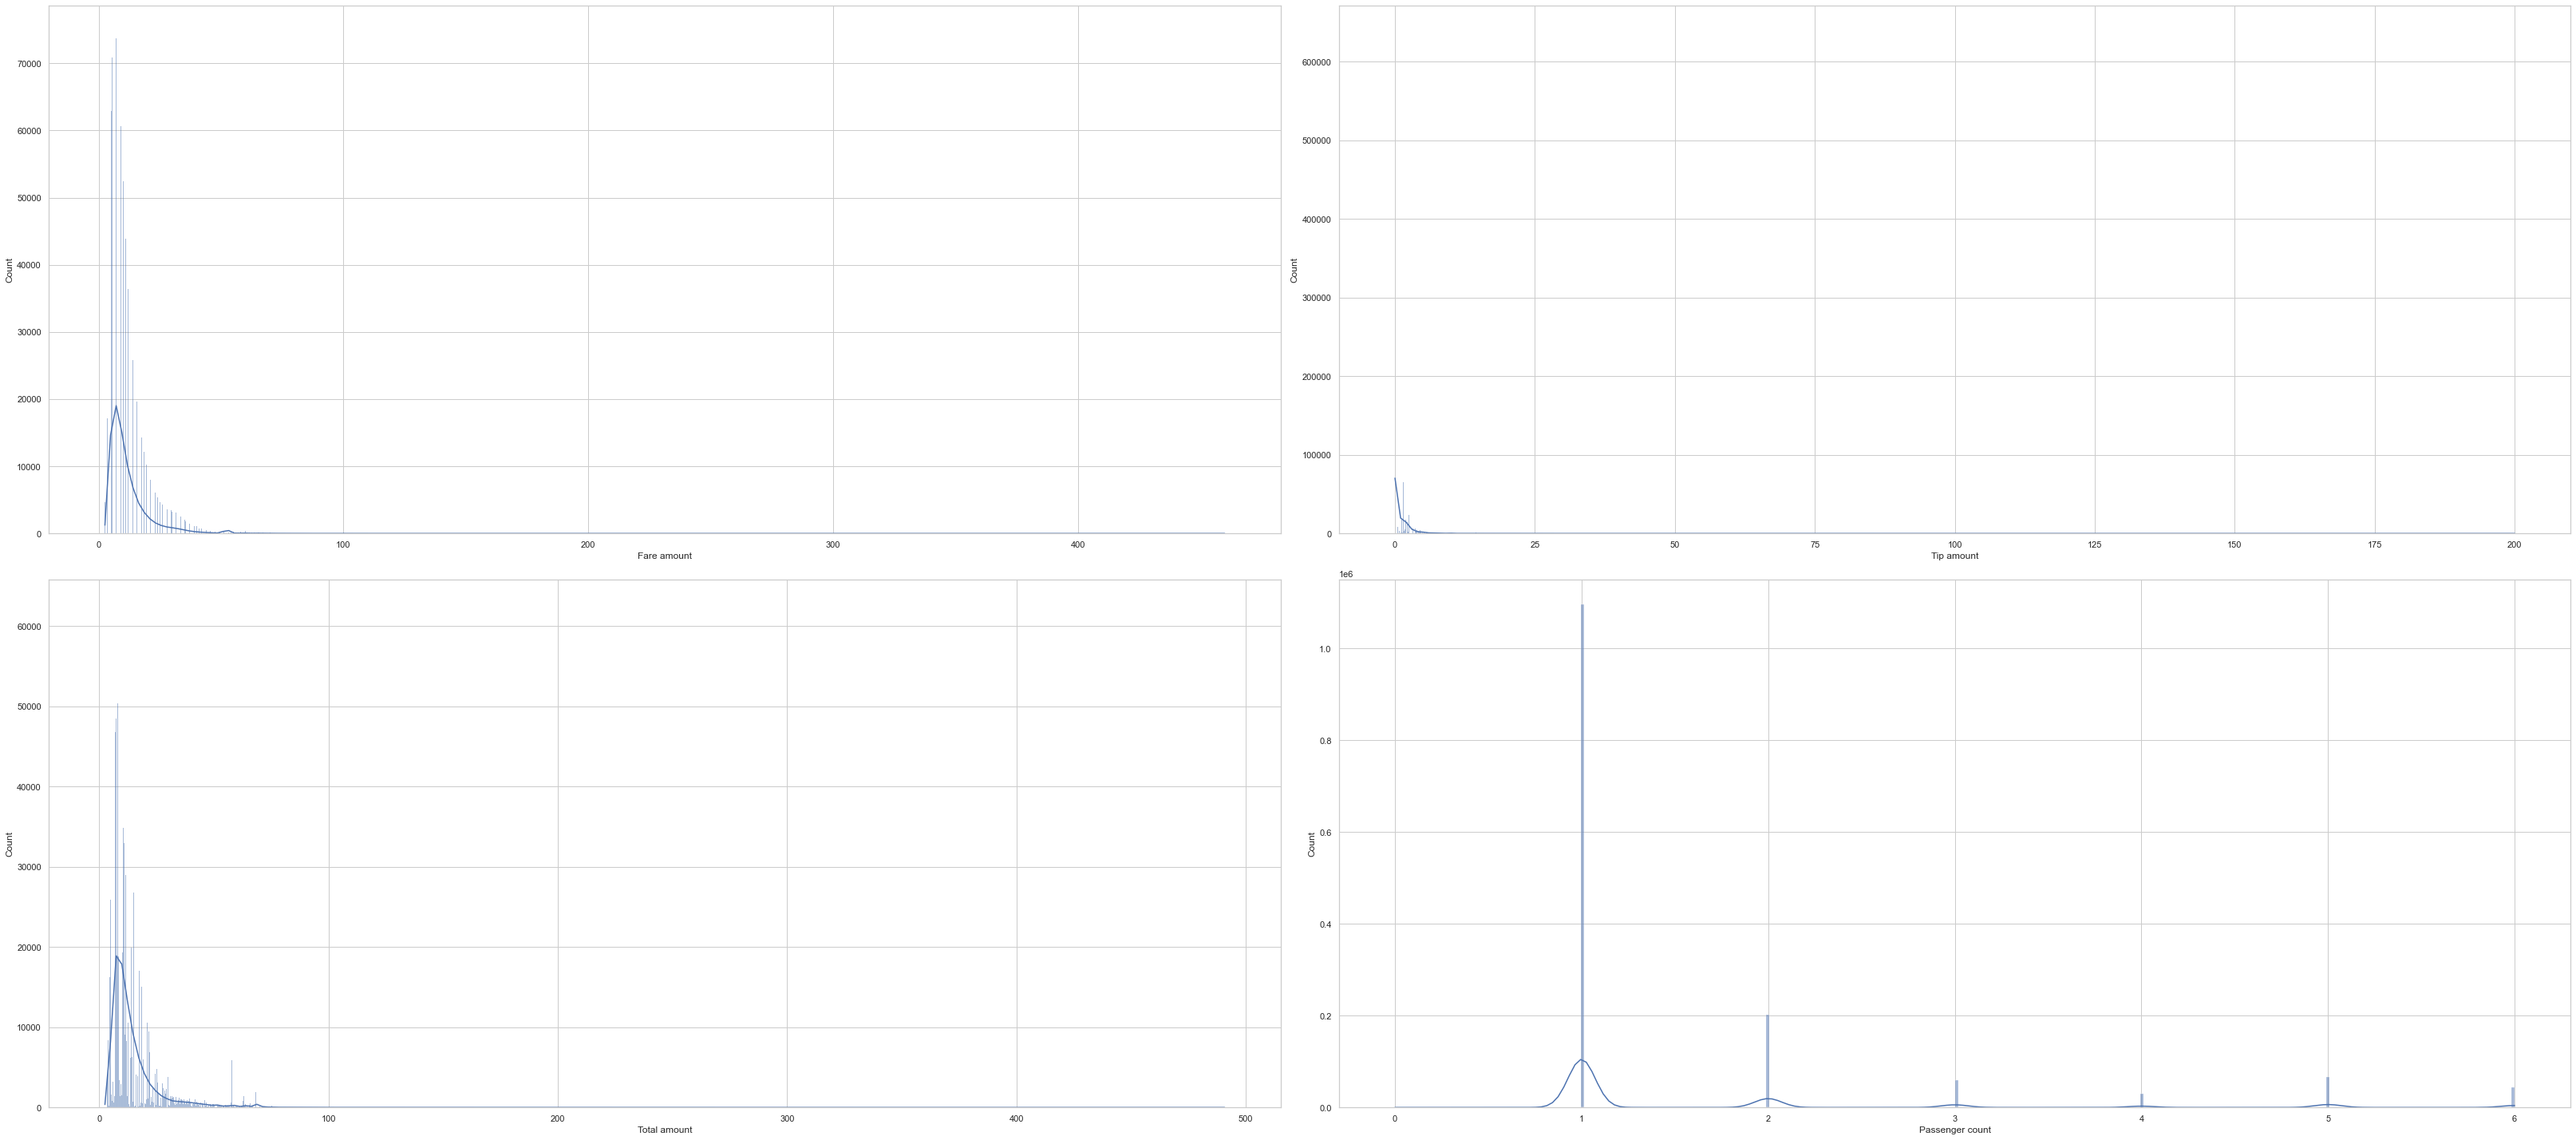

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (45,20))

plt.subplot(221)
axes = sns.histplot(data=BigData, x='fare_amount', kde=True)
axes.set(xlabel='Fare amount')

plt.subplot(222)
axes = sns.histplot(data=BigData, x='tip_amount', kde=True)
axes.set(xlabel='Tip amount')

plt.subplot(223)
axes = sns.histplot(data=BigData, x='total_amount', kde=True)
axes.set(xlabel='Total amount')

plt.subplot(224)
axes = sns.histplot(data=BigData, x='passenger_count', kde=True)
axes.set(xlabel='Passenger count')


plt.tight_layout()
plt.show()

# notice that there are some outliers plotted in these graphs. Then we must clean the outliers. 

Notice that there are some outliers in the distribution plots above which make the graph very right-skewed. We must remove these outliers to make the dataset more fit to use and prevent us from model misinterpretation. 

In [15]:
# remove the outliers

BigData = BigData[(BigData['fare_amount'] <= 50) & (BigData['tip_amount'] <= 10) & (BigData['passenger_count'] <= 5) &
                  (BigData['passenger_count'] >= 1) & (BigData['trip_time_in_secs'] > 0)]

ExternalData = ExternalData[(ExternalData['fare_amount'] <= 50) & (ExternalData['tip_amount'] <= 10) & (ExternalData['passenger_count'] <= 5) &
                  (ExternalData['passenger_count'] >= 1) & (ExternalData['trip_time_in_secs'] > 0)]

# remove no charge, dispute, and others

In [16]:
# The latitude and longitude of New York city are respectively ranging between
# 40 and 42, and -75 and -72. Data outside the boundaries should be removed then.

BigData = BigData[(BigData['pickup_longitude'] >= -74.257159) &
                  (BigData['pickup_longitude'] <= -73.699215) &
                  (BigData['pickup_latitude'] >= 40.495992) &
                  (BigData['pickup_latitude'] <= 40.915568)]
BigData = BigData[(BigData['dropoff_longitude'] >= -74.257159) &
                  (BigData['dropoff_longitude'] <= -73.699215) &
                  (BigData['dropoff_latitude'] >= 40.495992) &
                  (BigData['dropoff_latitude'] <= 40.915568)]

# for external data

ExternalData = ExternalData[(ExternalData['pickup_longitude'] >= -74.257159) &
                  (ExternalData['pickup_longitude'] <= -73.699215) &
                  (ExternalData['pickup_latitude'] >= 40.495992) &
                  (ExternalData['pickup_latitude'] <= 40.915568)]
ExternalData = ExternalData[(ExternalData['dropoff_longitude'] >= -74.257159) &
                  (ExternalData['dropoff_longitude'] <= -73.699215) &
                  (ExternalData['dropoff_latitude'] >= 40.495992) &
                  (ExternalData['dropoff_latitude'] <= 40.915568)]

In [17]:
# There are a few points with zero latitude and longitude which dont make sense

BigData = BigData[(BigData['pickup_longitude'] != 0) & (BigData['pickup_latitude'] != 0) &
                  (BigData['dropoff_longitude'] != 0) & (BigData['dropoff_latitude'] != 0)]

ExternalData = ExternalData[(ExternalData['pickup_longitude'] != 0) & (ExternalData['pickup_latitude'] != 0) &
                  (ExternalData['dropoff_longitude'] != 0) & (ExternalData['dropoff_latitude'] != 0)]

In [18]:
BigData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393637 entries, 0 to 1499999
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   medallion          1393637 non-null  object        
 1   hack_license       1393637 non-null  object        
 2   vendor_id          1393637 non-null  int64         
 3   pickup_datetime    1393637 non-null  datetime64[ns]
 4   dropoff_datetime   1393637 non-null  datetime64[ns]
 5   passenger_count    1393637 non-null  int64         
 6   trip_time_in_secs  1393637 non-null  int64         
 7   pickup_longitude   1393637 non-null  float64       
 8   pickup_latitude    1393637 non-null  float64       
 9   dropoff_longitude  1393637 non-null  float64       
 10  dropoff_latitude   1393637 non-null  float64       
 11  Hour-pickedup      1393637 non-null  int64         
 12  Weekday-pickedup   1393637 non-null  int64         
 13  Hour-dropoff       1393637 

Numerical feature distributions after getting cleansed

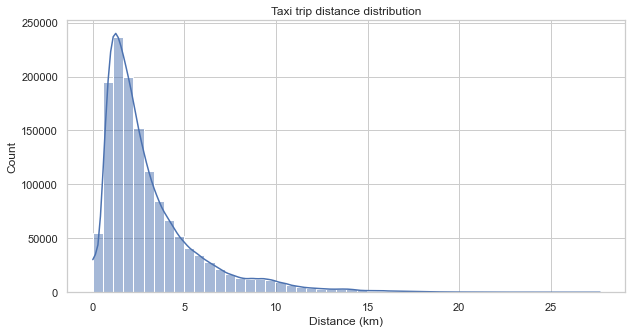

In [19]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
axes = sns.histplot(data=BigData, x='Distance (km)', kde=True, bins=50)
plt.title('Taxi trip distance distribution')

plt.show()

In [20]:
BigData['Distance (km)'].mean()

3.1116740457970016

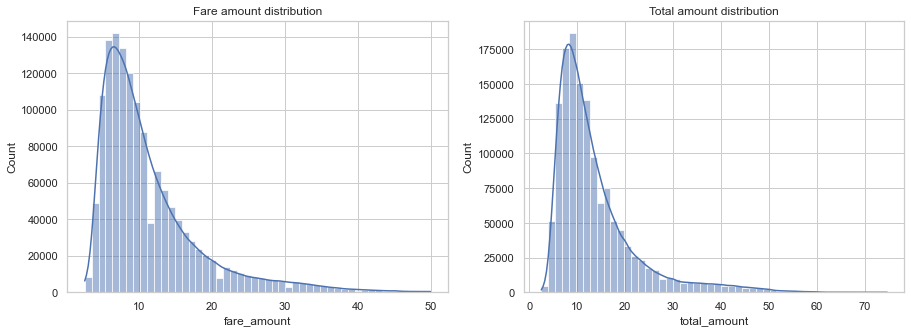

In [21]:
fig = plt.figure(figsize = (15,5))

#plot tenure vs monthly charges
ax1 = fig.add_subplot(1,2,1)
axes = sns.histplot(data=BigData, x='fare_amount', kde=True, bins=50)
plt.title('Fare amount distribution')

#plot price vs Engine(CC)
ax1 = fig.add_subplot(1,2,2)
axes = sns.histplot(data=BigData, x='total_amount', kde=True, bins=50)
plt.title('Total amount distribution')

plt.show()

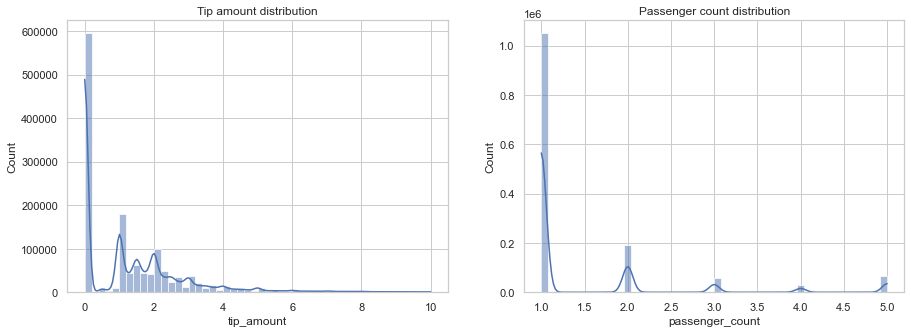

In [22]:
fig = plt.figure(figsize = (15,5))

#plot tenure vs monthly charges
ax1 = fig.add_subplot(1,2,1)
axes = sns.histplot(data=BigData, x='tip_amount', kde=True, bins=50)
plt.title('Tip amount distribution')

#plot price vs Engine(CC)
ax1 = fig.add_subplot(1,2,2)
axes = sns.histplot(data=BigData, x='passenger_count', kde=True, bins=50)
plt.title('Passenger count distribution')

plt.show()

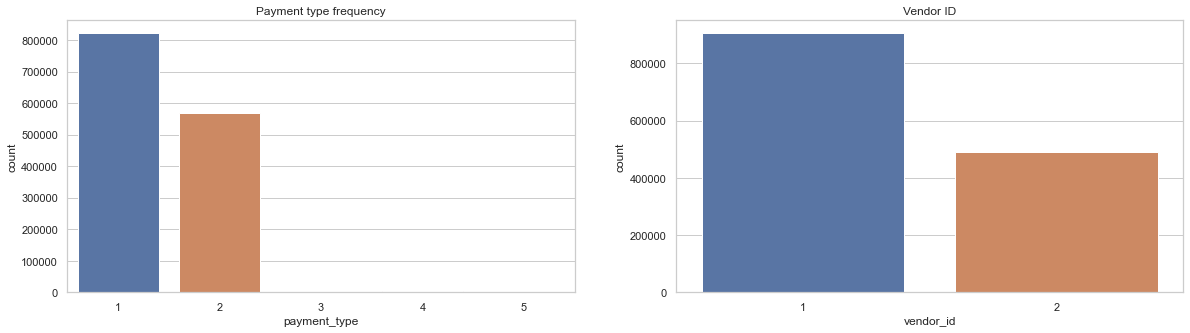

In [23]:
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(1,2,1)
axes = sns.countplot(x='payment_type', data=BigData)
plt.title('Payment type frequency')

ax1 = fig.add_subplot(1,2,2)
axes = sns.countplot(x='vendor_id', data=BigData)
plt.title('Vendor ID')

plt.show()

We have seen that there are two most dominant payment types; cash and credit. Only few thousand trips have their payment registered as Disputed, No Charge, or even Unknown, and they do not really contribute much to the whole payment time. So, the other three types are neglectable or able to be taken out. 

In [24]:
BigData = BigData[(BigData['payment_type']==1) | (BigData['payment_type']==2)]
ExternalData = ExternalData[(ExternalData['payment_type']==1) | (ExternalData['payment_type']==2)]

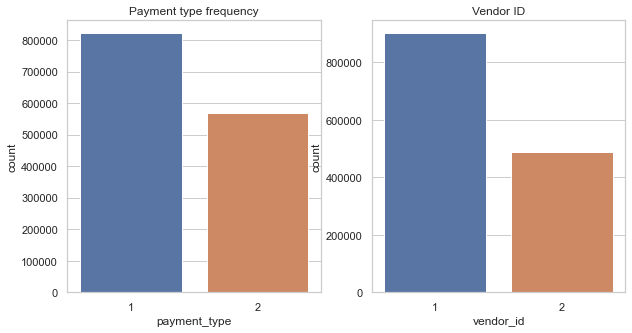

In [25]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
axes = sns.countplot(x='payment_type', data=BigData)
plt.title('Payment type frequency')

ax1 = fig.add_subplot(1,2,2)
axes = sns.countplot(x='vendor_id', data=BigData)
plt.title('Vendor ID')

plt.show()

Question 1: What are the top 5 busiest hours of the day. 

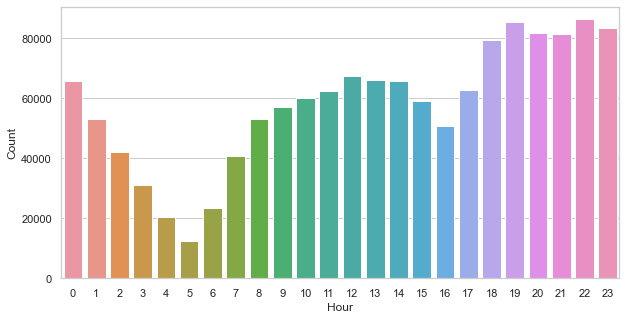

In [26]:
busiest = BigData['Hour-pickedup'].value_counts(ascending=True).rename_axis('Hour').reset_index(name='Count')
fig = plt.figure(figsize=(10,5))
axes = sns.barplot(x="Hour", y="Count", data=busiest)
plt.show()

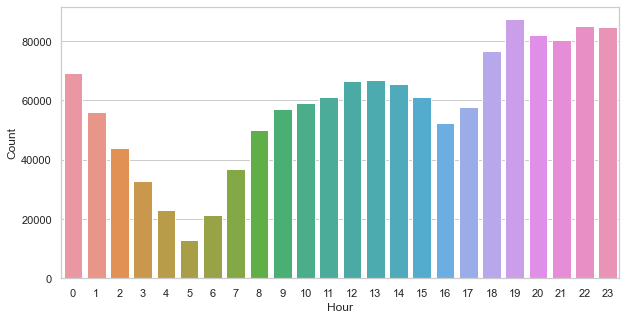

In [27]:
busiest = BigData['Hour-dropoff'].value_counts(ascending=True).rename_axis('Hour').reset_index(name='Count')
fig = plt.figure(figsize=(10,5))
axes = sns.barplot(x="Hour", y="Count", data=busiest)
plt.show()

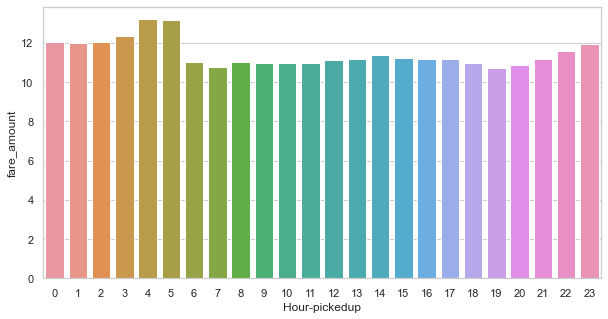

In [28]:
hour_fare = BigData.groupby('Hour-pickedup')['fare_amount'].mean()
hour_fare = pd.DataFrame(hour_fare).reset_index()

fig = plt.figure(figsize=(10,5))
axes = sns.barplot(x="Hour-pickedup", y="fare_amount", data=hour_fare)
plt.show()

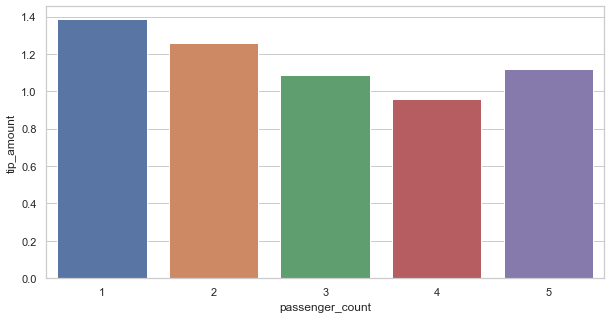

In [29]:
passenger_fare = BigData.groupby('passenger_count')['tip_amount'].mean()
passenger_fare = pd.DataFrame(passenger_fare).reset_index()

fig = plt.figure(figsize=(10,5))
axes = sns.barplot(x="passenger_count", y="tip_amount", data=passenger_fare)
plt.show()

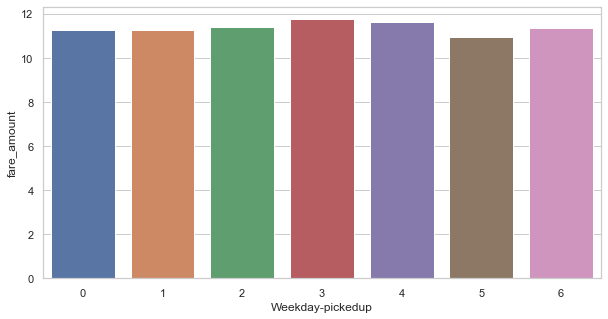

In [30]:
weekday_fare = BigData.groupby('Weekday-pickedup')['fare_amount'].mean()
weekday_fare = pd.DataFrame(weekday_fare).reset_index()

fig = plt.figure(figsize=(10,5))
axes = sns.barplot(x="Weekday-pickedup", y="fare_amount", data=weekday_fare)
plt.show()

In [31]:
busiest = BigData['Hour-pickedup'].value_counts().rename_axis('Hour').reset_index(name='Count').sort_values(by=['Count'], ascending=False)
busiest.head()

,Hour,Count
0,22,86150
1,19,85249
2,23,83356
3,20,81728
4,21,81196


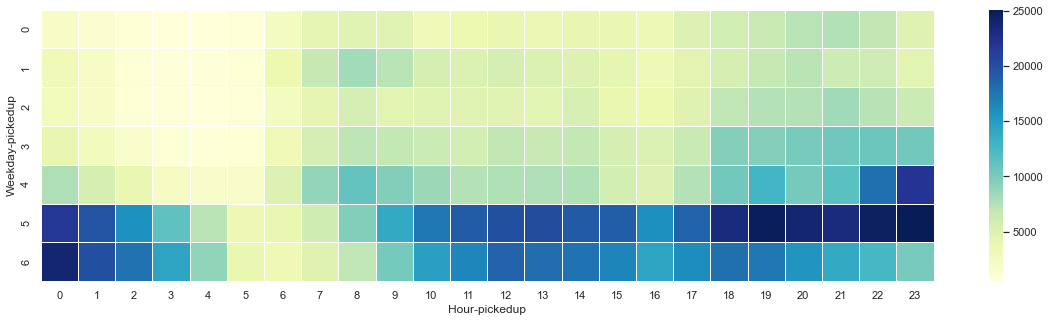

In [32]:
fig = plt.figure(figsize=(20,5))

busy_day_hour = pd.pivot_table(BigData, values='hack_license', index='Weekday-pickedup', columns='Hour-pickedup', aggfunc='count')
sns.heatmap(busy_day_hour, linewidths=.5, cmap="YlGnBu")
plt.show()

Question 2: What are the top 10 busiest locations of the city?

In [33]:
busy_loc = pd.DataFrame(BigData.groupby(['pickup_latitude', 'pickup_longitude']).size()).reset_index()
# busy_loc = pd.DataFrame(busy_loc).reset_index()
busy_loc.rename(columns={0:"Count"}, inplace=True)
busy_loc = busy_loc.sort_values(by='Count', ascending=False).head(10)
busy_loc

,pickup_latitude,pickup_longitude,Count
967008,40.765991,-74.023048,1500
341600,40.736053,-73.990944,127
506709,40.744915,-73.949043,64
150812,40.722073,-73.985542,34
3163,40.644886,-73.781319,31
655846,40.752167,-73.975525,26
2,40.548466,-74.195213,25
941748,40.764664,-73.991852,23
83382,40.715466,-73.992104,22
743421,40.756504,-73.998314,21


In [34]:
# plotting the NYC geomap

import folium
nyc = folium.Map(location=[40.73610,-73.935242], zoom_start=12)
nyc

In [35]:
for i in busy_loc.index[:20]:
    folium.CircleMarker(location=[busy_loc['pickup_latitude'][i], busy_loc['pickup_longitude'][i]], color='green').add_to(nyc)

In [36]:
nyc

Feature correlation. 

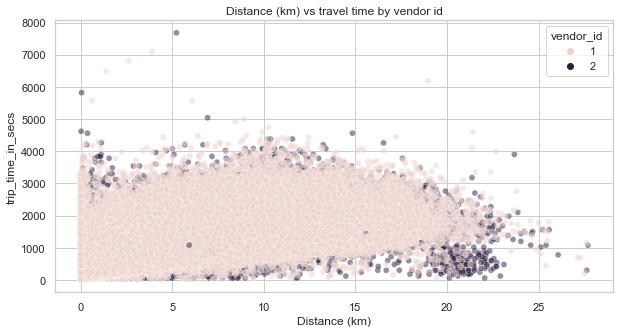

In [37]:
fig = plt.figure(figsize = (10,5))
plot1 = sns.scatterplot(y = 'trip_time_in_secs', x = 'Distance (km)', hue='vendor_id', data=BigData, alpha=0.5)
plt.title('Distance (km) vs travel time by vendor id')
plt.show()

After plotting the graph above, there is something odd with it. There is a slightly high concentration dots with distance more than 20 km and trip_time_in_secs less than 1000. It is supposed to be; the longer the trip takes, the more time it takes. Is it possible for a taxi to drive with high velocity in the mid of crowd? Then we check the distribution of the velocity. 

In [38]:
BigData['Velocity (km/h)'] = (BigData['Distance (km)'] * 3600)/BigData['trip_time_in_secs']
ExternalData['Velocity (km/h)'] = (ExternalData['Distance (km)'] * 3600)/ExternalData['trip_time_in_secs']

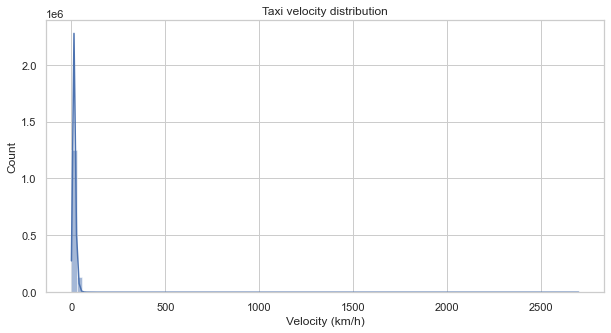

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
axes = sns.histplot(data=BigData, x='Velocity (km/h)', kde=True, bins=100)
plt.title('Taxi velocity distribution')

plt.show()

In [40]:
BigData[BigData['Velocity (km/h)']>100].head()

,medallion,hack_license,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,pickup_longitude,pickup_latitude,dropoff_longitude,...,Weekday-dropoff,Dayname-pickedup,Dayname-dropoff,Distance (km),payment_type,fare_amount,tip_amount,tolls_amount,total_amount,Velocity (km/h)
697,31192E33A41141F325579B7B934EF1A7,B7FB2044B776F94CA3E29C74B1701508,2,2013-04-12 23:44:00,2013-04-12 23:48:00,2,240,-73.960388,40.715408,-73.963913,...,4,Friday,Friday,9.830272,1,5.5,1.5,0.0,8.0,147.454087
849,162A967C11C5A4839059F1B1C9868C33,C5000DB015758B40F65FDF3BDCE627D1,2,2013-04-12 20:28:00,2013-04-12 20:29:00,1,60,-73.979462,40.758331,-73.964005,...,4,Friday,Friday,2.142945,2,3.5,0.0,0.0,4.5,128.576721
1992,2088AD3CCF67CA0175C6A5D2C06841A5,F981998A1D656109610977B19344FD33,2,2013-04-12 23:31:00,2013-04-12 23:34:00,1,180,-73.948128,40.774544,-74.003349,...,4,Friday,Friday,6.197893,2,4.0,0.0,0.0,5.0,123.957856
5276,B2B089B939CB4A0A64D42CBFC74059BD,58DECD65B31226ACB999F1D44DC432B3,2,2013-04-12 21:53:00,2013-04-12 21:54:00,1,60,-73.964973,40.759651,-73.977074,...,4,Friday,Friday,2.087741,2,3.5,0.0,0.0,4.5,125.264480
6775,AFE48D6CEFF680CEC02501824E4217F4,291F361FCEB2B764F8AA062AC1E4818E,2,2013-04-12 22:01:00,2013-04-12 22:03:00,1,120,-73.942253,40.790932,-73.964203,...,4,Friday,Friday,3.773807,1,4.5,1.5,0.0,7.0,113.214207


The distribution plotted above shows us a very heavy distribution. It is very non-sense since a taxi in NYC drives with velocity more than 1000 km per hour. We must filter out this condition. "On Tuesday, the City Council approved a bill that would reduce the maximum speed for cars, trucks and taxis on residential streets to 25 miles per hour, from 30 m.p.h. The change will be the subject of a three-week publicity campaign by city officials starting on Monday. The new speed limit will go into effect on Nov."

25 mph is approximately 40.2 kmh. 

In [41]:
# remove the outliers

BigData = BigData[(BigData['Velocity (km/h)'] <= 40.2) & (BigData['Velocity (km/h)'] > 0)]
ExternalData = ExternalData[(ExternalData['Velocity (km/h)'] <= 40.2) & (ExternalData['Velocity (km/h)'] > 0)]

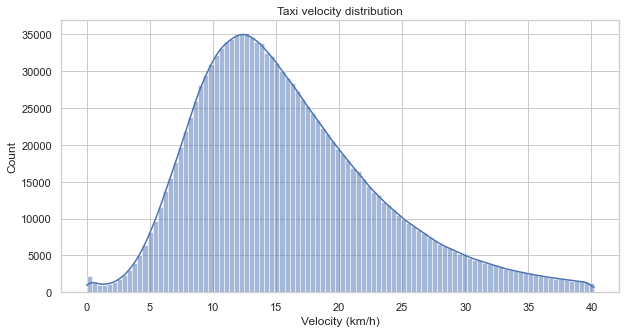

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
axes = sns.histplot(data=BigData, x='Velocity (km/h)', kde=True, bins=100)
plt.title('Taxi velocity distribution')

plt.show()

In [43]:
BigData[BigData['Velocity (km/h)'] < 5].head()

,medallion,hack_license,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,pickup_longitude,pickup_latitude,dropoff_longitude,...,Weekday-dropoff,Dayname-pickedup,Dayname-dropoff,Distance (km),payment_type,fare_amount,tip_amount,tolls_amount,total_amount,Velocity (km/h)
8,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,1,2013-04-04 19:20:16,2013-04-04 19:30:52,1,635,-73.978477,40.761230,-73.984566,...,3,Thursday,Thursday,0.550778,1,7.5,2.25,0.0,11.25,3.122520
63,24B947E1319F6ADBC55FB4B218FE4CC9,DF8B994DA5865B2B40DC47B8969E21FD,1,2013-04-04 12:31:25,2013-04-04 12:44:59,1,814,-73.988525,40.743191,-73.994514,...,3,Thursday,Thursday,0.976177,1,9.5,0.00,0.0,10.00,4.317246
76,277A0534CF97412E451D9914DD068982,E18B08D361BF580353C992B47448B9FE,1,2013-04-03 18:39:39,2013-04-03 19:03:56,1,1456,-73.989456,40.774658,-73.982765,...,2,Wednesday,Wednesday,1.552158,1,15.0,2.50,0.0,19.00,3.837754
87,CA8DFBC7AF031CBABDD5A592DFB2741C,3C9179450CD0C023C36D35033062D894,1,2013-04-03 18:06:22,2013-04-03 18:24:58,1,1116,-73.978592,40.764996,-73.985489,...,2,Wednesday,Wednesday,1.427744,1,12.0,2.70,0.0,16.20,4.605625
199,E5C4E648BEFADFF31B1A037E40E4AC44,194485C75EB1B936C8519449728BF0C3,2,2013-04-13 01:17:00,2013-04-13 01:23:00,1,360,-73.987663,40.719849,-73.988380,...,5,Saturday,Saturday,0.418542,2,6.0,0.00,0.0,7.00,4.185424


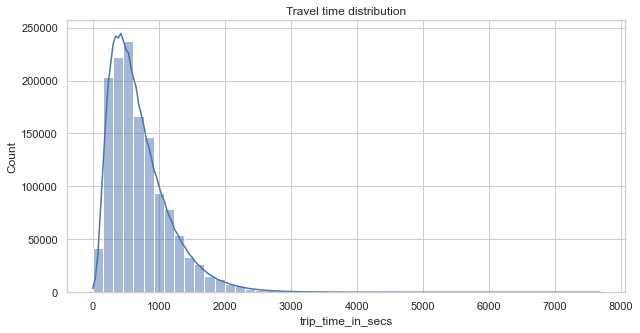

In [44]:
fig = plt.figure(figsize = (10,5))
axes = sns.histplot(data=BigData, x='trip_time_in_secs', kde=True, bins=50)
plt.title('Travel time distribution')

plt.show()

In [45]:
BigData['trip_time_in_secs'].mean()

705.9499326047063

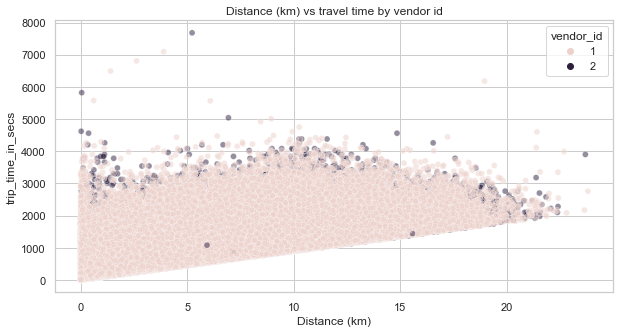

In [46]:
fig = plt.figure(figsize = (10,5))
plot1 = sns.scatterplot(y = 'trip_time_in_secs', x = 'Distance (km)', hue='vendor_id', data=BigData, alpha=0.5)
plt.title('Distance (km) vs travel time by vendor id')
plt.show()

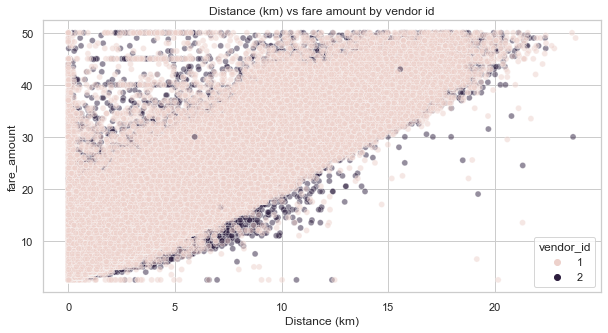

In [47]:
fig = plt.figure(figsize = (10,5))
plot1 = sns.scatterplot(y = 'fare_amount', x = 'Distance (km)', hue='vendor_id', data=BigData, alpha=0.5)
plt.title('Distance (km) vs fare amount by vendor id')
plt.show()

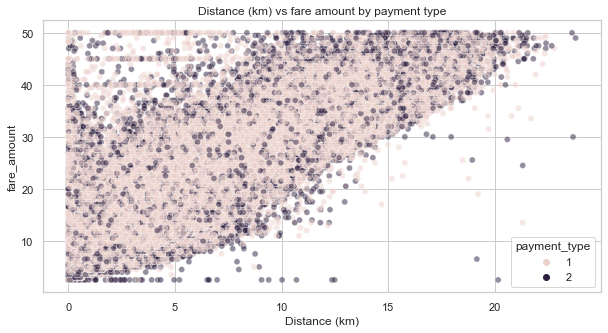

In [48]:
fig = plt.figure(figsize = (10,5))
plot1 = sns.scatterplot(y = 'fare_amount', x = 'Distance (km)', hue='payment_type', data=BigData, alpha=0.5)
plt.title('Distance (km) vs fare amount by payment type')
plt.show()

Question 3: Which trip has the highest standard deviation of travel time?

In [49]:
BigData['trip_time_in_min'] = BigData['trip_time_in_secs']/60
ExternalData['trip_time_in_min'] = ExternalData['trip_time_in_secs']/60
highest_sd_traveltime = pd.DataFrame(BigData.groupby(['pickup_latitude', 'pickup_longitude'])['trip_time_in_min'].std()).reset_index()
highest_sd_traveltime.sort_values(by='trip_time_in_min', ascending=False).head(5)

,pickup_latitude,pickup_longitude,trip_time_in_min
724183,40.756256,-73.990440,54.517933
267146,40.731209,-73.982338,44.689149
848943,40.761620,-73.982903,43.157084
1118576,40.776886,-73.961716,41.754655
968012,40.767082,-73.960007,40.305087


Question 4: Which trip has most consistent fares?

In [50]:
# consistent means lowest standard deviations
lowest_sd_fares = pd.DataFrame(BigData.groupby(['pickup_latitude', 'pickup_longitude'])['fare_amount'].std()).reset_index()
lowest_sd_fares.sort_values(by='fare_amount', ascending=True).head(5)

,pickup_latitude,pickup_longitude,fare_amount
282668,40.732449,-74.003365,0.0
318307,40.734737,-73.999664,0.0
788274,40.759048,-73.992310,0.0
125027,40.720364,-73.984467,0.0
437145,40.741924,-74.004524,0.0


In [51]:
BigData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354694 entries, 0 to 1499999
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   medallion          1354694 non-null  object        
 1   hack_license       1354694 non-null  object        
 2   vendor_id          1354694 non-null  int64         
 3   pickup_datetime    1354694 non-null  datetime64[ns]
 4   dropoff_datetime   1354694 non-null  datetime64[ns]
 5   passenger_count    1354694 non-null  int64         
 6   trip_time_in_secs  1354694 non-null  int64         
 7   pickup_longitude   1354694 non-null  float64       
 8   pickup_latitude    1354694 non-null  float64       
 9   dropoff_longitude  1354694 non-null  float64       
 10  dropoff_latitude   1354694 non-null  float64       
 11  Hour-pickedup      1354694 non-null  int64         
 12  Weekday-pickedup   1354694 non-null  int64         
 13  Hour-dropoff       1354694 

## D. Machine Learning Models Building

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In building machine learning models, there are several features which are not necessary or in other words, have a relatively low correlation with the target variables; fare_amount variables. Also, since we use regression algorithm which is only used for continuous variables, we must eliminate the categorical or ordinal variables such as vendor_id and payment_type. We split the data (X and y variable) into two dataset; training and testing dataset which is respectively 70% and 30% of the entire dataset. 

In [53]:
y = BigData['fare_amount']
X = BigData[['passenger_count', 'Hour-pickedup', 'Weekday-pickedup', 'Distance (km)']]

# for external data

y_ext = ExternalData['fare_amount']
X_ext = ExternalData[['passenger_count', 'Hour-pickedup', 'Weekday-pickedup', 'Distance (km)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

print("Train shape :  ", X_train.shape, " - ", y_train.shape)
print("Test shape :  ", X_test.shape, " - ", y_test.shape)

Train shape :   (948285, 4)  -  (948285,)
Test shape :   (406409, 4)  -  (406409,)


In [54]:
X_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 1500001 to 1500999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passenger_count   923 non-null    int64  
 1   Hour-pickedup     923 non-null    int64  
 2   Weekday-pickedup  923 non-null    int64  
 3   Distance (km)     923 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 36.1 KB


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354694 entries, 0 to 1499999
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   passenger_count   1354694 non-null  int64  
 1   Hour-pickedup     1354694 non-null  int64  
 2   Weekday-pickedup  1354694 non-null  int64  
 3   Distance (km)     1354694 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 83.9 MB


#### D.1. RANDOM FOREST

#### D.2 LINEAR REGRESSION MODEL

In [56]:
from sklearn import linear_model

reg1 = linear_model.LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [57]:
X_linear = pd.DataFrame(X_test)
Y_linear = reg1.predict(X_linear)

In [58]:
r2s = r2_score(y_test, Y_linear)
print("R2_score: ", round(r2s, 2))

R2_score:  0.84


In [59]:
Y_linear = pd.DataFrame(Y_linear)
Y_linear.reset_index()
Y_linear.columns = ['Predicted Fare']

In [60]:
X_linear.reset_index(drop=True, inplace=True)
Y_linear.reset_index(drop=True, inplace=True)

MergedPredictedLinear = pd.concat([X_linear, Y_linear], axis=1)
MergedPredictedLinear.head(5)

,passenger_count,Hour-pickedup,Weekday-pickedup,Distance (km),Predicted Fare
0,1,4,6,0.767010,5.339062
1,3,23,6,1.472118,7.344332
2,1,19,0,0.868178,6.147039
3,2,20,5,0.980847,6.131662
4,1,21,6,0.474520,4.782451


In [61]:
Y_test = pd.DataFrame(y_test)
Y_test.reset_index()
Y_test.columns = ['Tested Fare']

In [62]:
MergedPredictedLinear = pd.concat([X_linear, Y_linear, Y_test], axis=1)

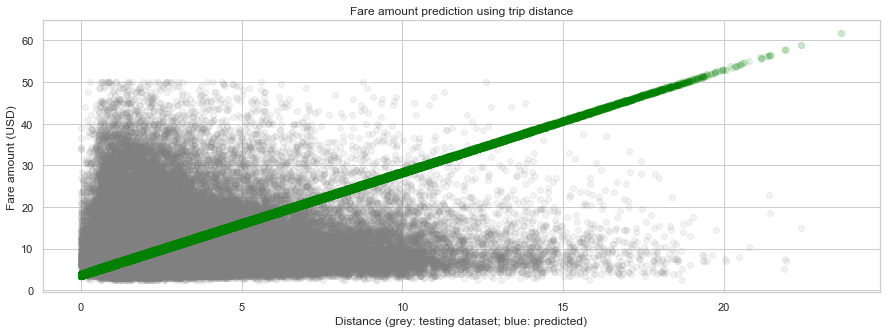

In [63]:
fig = plt.figure(figsize = (15,5))

plt.scatter(MergedPredictedLinear['Distance (km)'], MergedPredictedLinear['Tested Fare'], color='grey', alpha=0.1)
plt.scatter(MergedPredictedLinear['Distance (km)'], MergedPredictedLinear['Predicted Fare'], color='green', alpha=0.1)
plt.xlabel('Distance (grey: testing dataset; blue: predicted)')
plt.ylabel('Fare amount (USD)')
plt.title('Fare amount prediction using trip distance')

plt.show()

Just plot the first 500 data. 

In [64]:
MergedPredictedLinear1500 = MergedPredictedLinear.iloc[:1500,:]

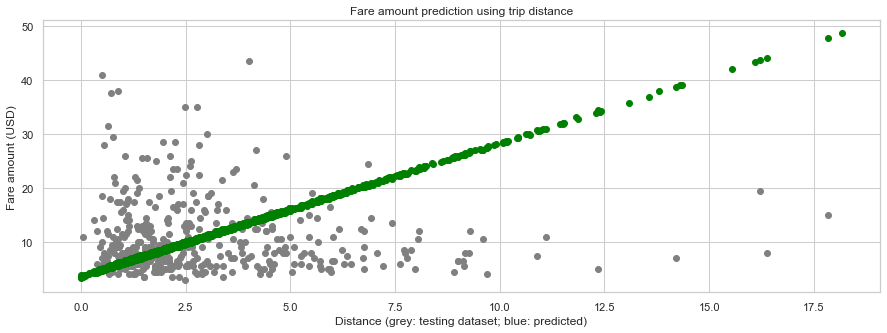

In [65]:
fig = plt.figure(figsize = (15,5))

plt.scatter(MergedPredictedLinear1500['Distance (km)'], MergedPredictedLinear1500['Tested Fare'], color='grey')
plt.scatter(MergedPredictedLinear1500['Distance (km)'], MergedPredictedLinear1500['Predicted Fare'], color='green')
plt.xlabel('Distance (grey: testing dataset; blue: predicted)')
plt.ylabel('Fare amount (USD)')
plt.title('Fare amount prediction using trip distance')

plt.show()

In [66]:
MergedPredictedLinear1500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passenger_count   1500 non-null   float64
 1   Hour-pickedup     1500 non-null   float64
 2   Weekday-pickedup  1500 non-null   float64
 3   Distance (km)     1500 non-null   float64
 4   Predicted Fare    1500 non-null   float64
 5   Tested Fare       396 non-null    float64
dtypes: float64(6)
memory usage: 82.0 KB


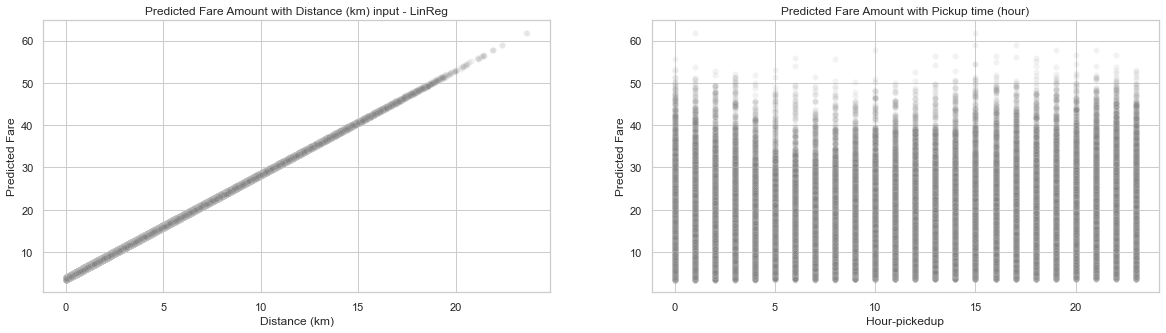

In [67]:
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(1,2,1)
plot1 = sns.scatterplot(y = 'Predicted Fare', x = 'Distance (km)', data=MergedPredictedLinear, alpha=0.1, color='grey')
plt.title('Predicted Fare Amount with Distance (km) input - LinReg')

ax1 = fig.add_subplot(1,2,2)
plot1 = sns.scatterplot(y = 'Predicted Fare', x = 'Hour-pickedup', data=MergedPredictedLinear, alpha=0.1, color='grey')
plt.title('Predicted Fare Amount with Pickup time (hour)')

plt.show()

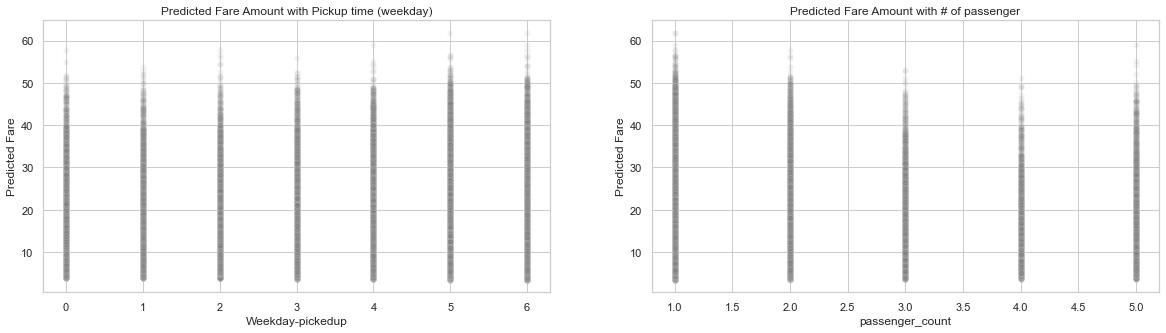

In [68]:
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(1,2,1)
plot1 = sns.scatterplot(y = 'Predicted Fare', x = 'Weekday-pickedup', data=MergedPredictedLinear, alpha=0.1, color='grey')
plt.title('Predicted Fare Amount with Pickup time (weekday)')

ax1 = fig.add_subplot(1,2,2)
plot1 = sns.scatterplot(y = 'Predicted Fare', x = 'passenger_count', data=MergedPredictedLinear, alpha=0.1, color='grey')
plt.title('Predicted Fare Amount with # of passenger')

plt.show()

In [69]:
coef_dict = {'features':X_linear.columns,
             'coefficient':reg1.coef_}
coeff = pd.DataFrame(coef_dict, columns=['features', 'coefficient'])
coeff

,features,coefficient
0,passenger_count,0.042472
1,Hour-pickedup,0.009645
2,Weekday-pickedup,-0.069012
3,Distance (km),2.463567


In [70]:
print("Score test: ", round(reg1.score(X_test, y_test)*100,2),"%")

Score test:  83.68 %


##### D.2.1 EXTERNAL DATASET FOR MACHINE LEARNING PREDICTION

In [71]:
y_extlinear = reg1.predict(X_ext)
y_extlinear = pd.DataFrame(y_extlinear)
y_extlinear.reset_index()
y_extlinear.columns = ['Predicted Fare']

In [72]:
X_extlinear = pd.DataFrame(X_ext)

X_extlinear.reset_index(drop=True, inplace=True)
y_extlinear.reset_index(drop=True, inplace=True)

MergedPredictedExtLinear = pd.concat([X_extlinear, y_extlinear], axis=1)
MergedPredictedExtLinear.head(5)

,passenger_count,Hour-pickedup,Weekday-pickedup,Distance (km),Predicted Fare
0,1,10,1,0.596964,5.323071
1,2,0,4,5.179674,16.351871
2,1,17,4,0.831562,5.761494
3,3,19,4,1.359618,7.166628
4,1,17,4,1.471591,7.338248


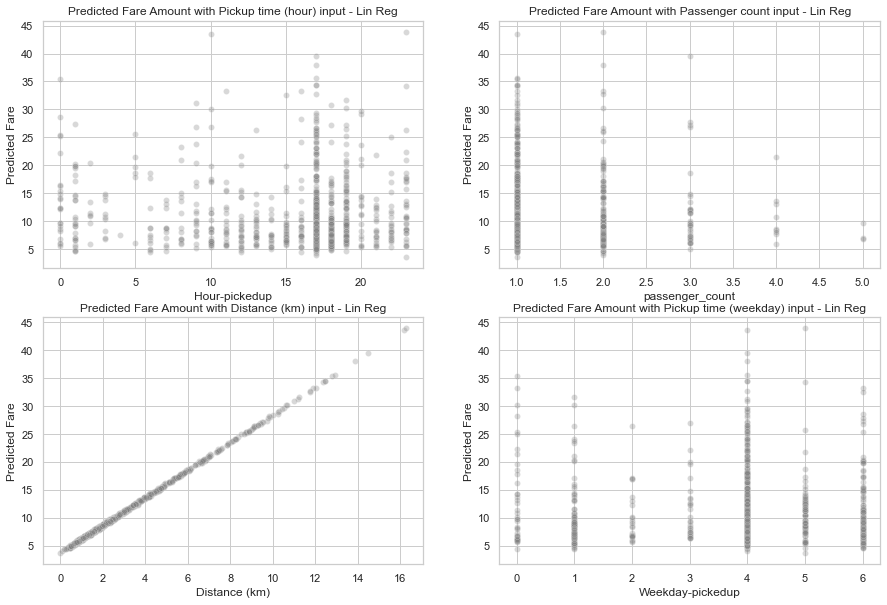

In [73]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,2,1)
plot1 = sns.scatterplot(y = 'Predicted Fare', x = 'Hour-pickedup', data=MergedPredictedExtLinear, alpha=0.3, color='grey')
plt.title('Predicted Fare Amount with Pickup time (hour) input - Lin Reg')

ax1 = fig.add_subplot(2,2,2)
plot1 = sns.scatterplot(y = 'Predicted Fare', x = 'passenger_count', data=MergedPredictedExtLinear, alpha=0.3, color='grey')
plt.title('Predicted Fare Amount with Passenger count input - Lin Reg')

ax1 = fig.add_subplot(2,2,3)
plot1 = sns.scatterplot(y = 'Predicted Fare', x = 'Distance (km)', data=MergedPredictedExtLinear, alpha=0.3, color='grey')
plt.title('Predicted Fare Amount with Distance (km) input - Lin Reg')

ax1 = fig.add_subplot(2,2,4)
plot1 = sns.scatterplot(y = 'Predicted Fare', x = 'Weekday-pickedup', data=MergedPredictedExtLinear, alpha=0.3, color='grey')
plt.title('Predicted Fare Amount with Pickup time (weekday) input - Lin Reg') #weekday pickedup

plt.show()

Let us try a new simple case with an input of four predictors. 

In [74]:
pass_count = int(input("Enter the # of passenger in taxi (max: 6) : "))

if pass_count not in range(1, 7):
    print("Please input between 1 and 6!")
else:
    print("Ok!")

Enter the # of passenger in taxi (max: 6) : 2
Ok!


In [75]:
hour = int(input("What time do you want to take a taxi (select from 0 to 23) : "))

if hour not in range(0, 24):
    print("Please input hour between 0 and 23!")
else:
    print("Ok!")

What time do you want to take a taxi (select from 0 to 23) : 19
Ok!


In [76]:
weekday = int(input("What day will you be picked up? (Monday=0 -> Sunday=6): "))

if weekday not in range(0, 7):
    print("Please input daynumber between 0 and 6!")
else:
    print("Ok!")

What day will you be picked up? (Monday=0 -> Sunday=6): 3
Ok!


In [77]:
lat_pu = float(input("Pickup point latitude: "))
long_pu = float(input("Pickup point longitude: "))
lat_do = float(input("Dropoff point latitude: "))
long_do = float(input("Dropoff point longitude: "))

if min(40.495992, 40.915568) <= lat_pu <= max(40.495992, 40.915568) and\
    min(40.495992, 40.915568) <= lat_do <= max(40.495992, 40.915568) and\
    min(-74.257159, -73.699215) <= long_pu <= max(-74.257159, -73.699215) and\
    min(-74.257159, -73.699215) <= long_do <= max(-74.257159, -73.699215):
    
    long_pu, lat_pu, long_do, lat_do = map(np.radians, [long_pu, lat_pu, long_do, lat_do])

    dlon = long_do - long_pu
    dlat = lat_do -lat_pu

    a = np.sin(dlat/2.0)**2 + np.cos(lat_pu) * np.cos(lat_do) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    dist = 6367 * c

else:
    print("Please input coordinates within NYC boundaries!")

Pickup point latitude: 40.7345
Pickup point longitude: -73.9903
Dropoff point latitude: 40.7616
Dropoff point longitude: -73.9646


In [78]:
simpledata = [{'passenger_count': pass_count,
               'Hour_pickedup': hour, 
               'Weekday-pickedup': weekday,
               'Distance (km)': dist}]
df = pd.DataFrame(simpledata)
pred=reg1.predict(df)
print("Your predicted taxi fare in USD is: ", round(pred[0],2))

Your predicted taxi fare in USD is:  12.98


In [79]:
# 40.7345° N, 73.9903° W 14th union square 
# roosevelt island tramway 40.7616° N, 73.9646° W